In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from scipy.stats import shapiro 

from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# import datasets
anwr = pd.read_csv('/content/drive/MyDrive/Term/Working Code/Omeed/Data/AMSR/ANWR_snowCover.csv')
npra = pd.read_csv('/content/drive/MyDrive/Term/Working Code/Omeed/Data/NPR-A/NPR_A_snowCover.csv')

In [ ]:
# get mean snow cover per day
anwr = anwr[['date', 'Mean']]
anwr = anwr.rename(columns={"Mean": "snow_cover"})

npra = npra[['date', 'Mean']]
npra = npra.rename(columns={"Mean": "snow_cover"})

In [ ]:
# convert to datetime
anwr['date']=pd.to_datetime(anwr['date'])

npra['date']=pd.to_datetime(npra['date'])

In [ ]:
# Filter for only months September to May
# df_filtered = df[(df['date'].dt.month >= 9) | (df['date'].dt.month <= 5)]

In [ ]:
# set index as date
anwr.set_index('date', inplace=True)

npra.set_index('date', inplace=True)

# Normality Test

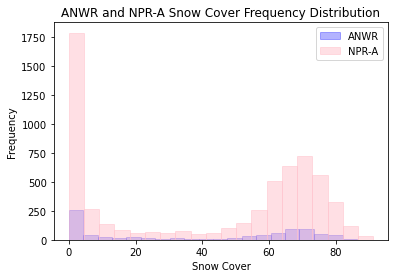

In [ ]:
#create histogram to visualize values in dataset
plt.hist(anwr['snow_cover'], edgecolor='blue', bins=20, alpha=0.3, label='ANWR', color='blue')
plt.hist(npra['snow_cover'], edgecolor='pink', bins=20, alpha=0.5, label='NPR-A', color="pink")

plt.xlabel('Snow Cover')
plt.ylabel('Frequency')
plt.title('ANWR and NPR-A Snow Cover Frequency Distribution')
plt.legend()
plt.show()

Dataset does not exhibit a “bell-shape” = normally distributed

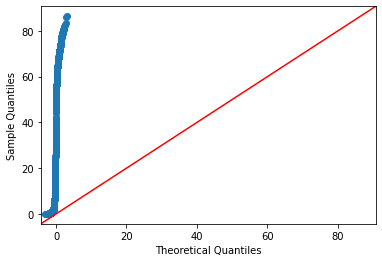

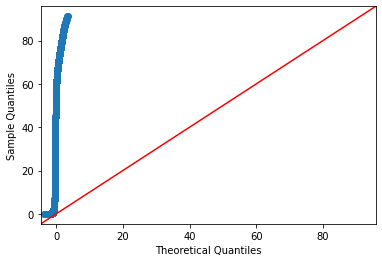

In [ ]:
# Q-Q plot
fig = sm.qqplot(anwr['snow_cover'], line='45')
fig = sm.qqplot(npra['snow_cover'], line='45')
plt.show()

Plot does not fall along the red line = not normally distributed

In [ ]:
#perform Shapiro-Wilk test for normality
shapiro(anwr['snow_cover'])

ShapiroResult(statistic=0.820675253868103, pvalue=9.555833942919231e-30)

In [ ]:
shapiro(npra['snow_cover'])

/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.8145565986633301, pvalue=0.0)

ShapiroResult(statistic=0.8168862462043762, pvalue=0.0)
Since the p-value is less than .05, we reject the null hypothesis of that the data is normally distributed

# Exploratory Visualizations

Text(0, 0.5, '')

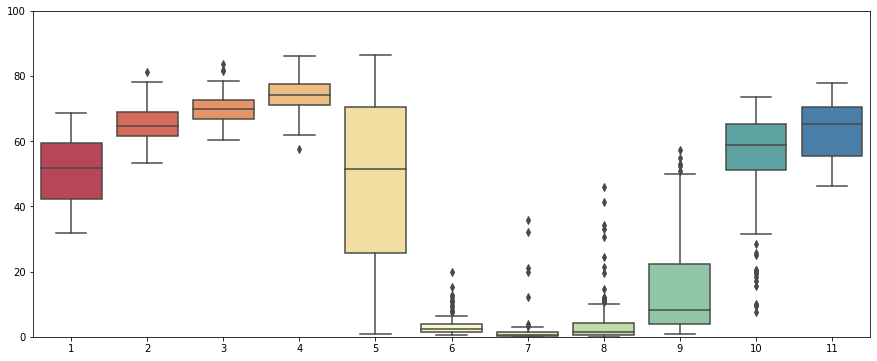

In [ ]:
# monthly box plots
fig, ax = plt.subplots(figsize=(15,6))
ax.set(ylim=(0,100))
sns.boxplot(data = anwr, x=anwr.index.month, y='snow_cover', ax=ax, palette='Spectral')
plt.xlabel(None)
plt.ylabel(None)
# plt.xlabel("Month", fontsize = 22)
# plt.ylabel("Snow Cover per Pixel", fontsize = 22)
# plt.title("ANWR Monthly Snow Cover for 2000-2022", fontsize = 25)

Text(0, 0.5, '')

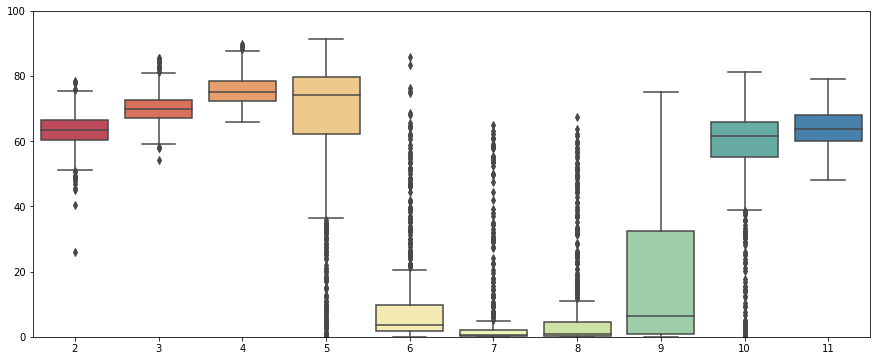

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set(ylim=(0,100))
sns.boxplot(data = npra, x=npra.index.month, y='snow_cover', ax=ax, palette='Spectral')
plt.xlabel(None)
plt.ylabel(None)
# plt.style.use('viridis')
# plt.xlabel("Month", fontsize = 22)
# plt.ylabel("Snow Cover", fontsize = 22)
# plt.title("NPR-A Monthly Snow Cover for 2000-2022", fontsize = 25)

# Decomposing Time Series

In [ ]:
# extracting features
anwr['dow'] = anwr.index.dayofweek
anwr['doy'] = anwr.index.dayofyear
anwr['year'] = anwr.index.year
anwr['month'] = anwr.index.month
anwr['quarter'] = anwr.index.quarter
anwr['weekday'] = anwr.index.day_name()
anwr['woy'] = anwr.index.weekofyear
anwr['dom'] = anwr.index.day # Day of Month
anwr['date'] = anwr.index.date 

# let's add the season number
anwr['season'] = anwr['month'].apply(lambda month_number: (month_number%12 + 3)//3)

<ipython-input-47-7b01798919af>:8: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [ ]:
npra['dow'] = npra.index.dayofweek
npra['doy'] = npra.index.dayofyear
npra['year'] = npra.index.year
npra['month'] = npra.index.month
npra['quarter'] = npra.index.quarter
npra['weekday'] = npra.index.day_name()
npra['woy'] = npra.index.weekofyear
npra['dom'] = npra.index.day # Day of Month
npra['date'] = npra.index.date 

# let's add the season number
npra['season'] = npra['month'].apply(lambda month_number: (month_number%12 + 3)//3)

<ipython-input-48-3731a09a6de8>:8: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# seasonal_decompose needs a dataframe with a datetime index
anwr_series = anwr[['snow_cover']]

# decomposing the time-series, with the frequency of 365 days
anwr_decomposed = seasonal_decompose(anwr_series, model='additive', period=365)
anwr_observed = anwr_decomposed.observed
anwr_trend = anwr_decomposed.trend
anwr_seasonal = anwr_decomposed.seasonal
anwr_residual = anwr_decomposed.resid

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# seasonal_decompose needs a dataframe with a datetime index
npra_series = npra[['snow_cover']]

# decomposing the time-series, with the frequency of 365 days
npra_series_decomposed = seasonal_decompose(npra_series, model='additive', period=365)
npra_observed = npra_series_decomposed.observed
npra_trend = npra_series_decomposed.trend
npra_seasonal = npra_series_decomposed.seasonal
npra_residual = npra_series_decomposed.resid

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# make subplots
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=("Observed", "Trend", "Seasonality", "Residuals"))

# Add traces
fig.add_trace(go.Scatter(x=anwr.index, y=anwr['snow_cover'],
                         line=dict(width=1.5)), row=1, col=1)
fig.add_trace(go.Scatter(x=anwr_trend.index, y=anwr_trend, 
                         line=dict(width=2)), row=2, col=1)
fig.add_trace(go.Scatter(x=anwr_seasonal.index, y=anwr_seasonal,
                         line=dict(width=1.5)), row=3, col=1)
fig.add_trace(go.Scatter(x=anwr_residual.index, y=anwr_residual,
                         line=dict(width=1.5)), row=4, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Year", row=1, col=1, showticklabels=True)
fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_xaxes(title_text="Year", row=3, col=1)
fig.update_xaxes(title_text="Year", row=4, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Snow Cover", row=1, col=1)
fig.update_yaxes(title_text="Snow Cover", row=2, col=1)
fig.update_yaxes(title_text="Snow Cover", row=3, col=1)
fig.update_yaxes(title_text="Snow Cover", row=4, col=1)

fig.update_layout(height=800, width=900,
                  title_text="ANWR Time Series Decomposition",
                  template="plotly_white",
                  showlegend=False)

fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# make subplots
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=("Observed", "Trend", "Seasonality", "Residuals"))

# Add traces
fig.add_trace(go.Scatter(x=npra.index, y=npra['snow_cover'],
                         line=dict(width=1.5)), row=1, col=1)
fig.add_trace(go.Scatter(x=npra_trend.index, y=npra_trend, 
                         line=dict(width=2)), row=2, col=1)
fig.add_trace(go.Scatter(x=npra_seasonal.index, y=npra_seasonal,
                         line=dict(width=1.5)), row=3, col=1)
fig.add_trace(go.Scatter(x=npra_residual.index, y=npra_residual,
                         line=dict(width=1.5)), row=4, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Year", row=1, col=1, showticklabels=True)
fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_xaxes(title_text="Year", row=3, col=1)
fig.update_xaxes(title_text="Year", row=4, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Snow Cover", row=1, col=1)
fig.update_yaxes(title_text="Snow Cover", row=2, col=1)
fig.update_yaxes(title_text="Snow Cover", row=3, col=1)
fig.update_yaxes(title_text="Snow Cover", row=4, col=1)

fig.update_layout(height=800, width=900,
                  title_text="NPR-A Time Series Decomposition",
                  template="plotly_white",
                  showlegend=False)

fig.show()

# Yearly Seasonal Patterns

Season 1 = Winter

Season 2 = Spring

Season 3 = Summer

Season 4 = Fall

In [ ]:
# Define custom labels for the legend
legend_labels = {1: 'Summer', 2: 'Fall', 3: 'Winter', 4: 'Spring'}

# aggregated data
_ = anwr\
    .groupby(['year', 'season'], as_index=False)\
    .agg({'snow_cover':'median'})

# plotting
fig = px.line(_, 
              x='year', 
              y='snow_cover', 
              color='season',
              template="plotly_white")
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Snow Cover',
                  title='ANWR Snow Cover',
                  font_size=17,
                  legend_title_text='Season')

# set legend item names
for i, season in legend_labels.items():
    fig.data[i-1].name = season

fig.show()

In [ ]:
# aggregated data
_ = npra\
    .groupby(['year', 'season'], as_index=False)\
    .agg({'snow_cover':'median'})

# plotting
fig = px.line(_, 
              x='year', 
              y='snow_cover', 
              color='season',
              template="plotly_white")
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Snow Cover',
                  title='NPR-A Snow Cover',
                  font_size=17,
                  legend_title_text='Season')


# set legend item names
for i, season in legend_labels.items():
    fig.data[i-1].name = season

fig.show()